# CONSUMPTION-SAVING MODEL 

Imports and Magics 

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model Description 

This model tries to replicate the intertemporal decision that is to whether consume now or save for later. 


So, the framework is as follows : 
- $W$ : the initial wealth. 
- $\beta$ : the time discount factor.
- $c_t$ : the amount of wealth consumed at t. 
- time is discrete and can be finite or infinite. 

Therefore, here is the model when time is finite : 

$$\begin{align*}
    V_t^*(W_t) &= \max_{0\leq c_t \leq W_t} \{ \sqrt{c_t} +\beta V_{t+1}(W_{t+1}) \} \\
    & \text{s.t.} \\
    W_{t+1} &= W_t -c_t\\
    c_t &\in \mathbb{N}_0, \, \forall t
\end{align*}$$



From these equations we can see that the aim is to maximize the discounted utility. We are looking for the level of consumption ($c^*_t$) at each period that maximizes the utility ($V^*_t$) at each period too.

The utility depends on the amount consumed at t but also on the amount consumed at t+1 which is discounted by $\beta$.

In the last period $V_T(W_T) = \max_{0\leq c_T \leq W_T}\{ \sqrt{c_T} \}$ because there is no tomorrow, and it is therefore optimal to consume everything, $c_T = W_T$.

# Solving the model with backward induction 

Since we know that at the last period it is optimal to consume everything and that each value function at t ($V^*_t(W_t)$) depends on the value function of the next period. So, in other words, it depends on the future consumption. Therefore to solve this model we will use backward induction to find the solution starting from the last period to find the first one.

In [133]:
# 1. parameters : 
beta = 0.9
W = 5 
T = 3 

# 2. initialize : 
V_optimal = np.nan + np.zeros([W+1,T]) 
C_optimal = np.nan + np.zeros([W+1,T]) # create two W+1 by T empty matrices 
C_optimal[:,T-1] = np.arange(W+1) 
V_optimal[:,T-1] = np.sqrt(C_optimal[:,T-1]) # fill last column with answers 

# 3. Some visuals to understand the set up 
columns = ['t = 1', 't = 2', 't = 3']
index = [f'W = {w}' for w in range(W+1)]
df = pd.DataFrame(C_optimal, index=index, columns=columns)
print("Optimal consumption matrix : Set up ")
print(df) 

columns = ['t = 1', 't = 2', 't = 3']
index = [f'C = {w}' for w in range(W+1)]
df = pd.DataFrame(V_optimal, index=index, columns=columns)
print("Optimal utilities matrix : Set up")
print(df)



Optimal consumption matrix : Set up 
       t = 1  t = 2  t = 3
W = 0    NaN    NaN    0.0
W = 1    NaN    NaN    1.0
W = 2    NaN    NaN    2.0
W = 3    NaN    NaN    3.0
W = 4    NaN    NaN    4.0
W = 5    NaN    NaN    5.0
Optimal utilities matrix : Set up
       t = 1  t = 2     t = 3
C = 0    NaN    NaN  0.000000
C = 1    NaN    NaN  1.000000
C = 2    NaN    NaN  1.414214
C = 3    NaN    NaN  1.732051
C = 4    NaN    NaN  2.000000
C = 5    NaN    NaN  2.236068


In [134]:
# 4. solve : 
for t in range(T-2, -1, -1):  # from period T-2 until period 0, (from T-2 because T-1 is already filled)
    for w_now in range(W+1): 
        c_now = np.arange(w_now+1) 
        w_next = w_now - c_now  # compute next value of wealth
        V_next = V_optimal[w_next,t+1] # compute next value function for each possible value of wealth
        V_guess = np.sqrt(c_now)+beta*V_next  # compute current value function for each possible combination of consumption and next value function
        V_optimal[w_now,t] = np.amax(V_guess) # select highest value from the V_guess vector
        C_optimal[w_now,t] = np.argmax(V_guess) # and its corresponding consumption

# 5. Print solutions matrices 
columns = ['t = 1', 't = 2', 't = 3']
index = [f'W = {w}' for w in range(W+1)]
df = pd.DataFrame(C_optimal, index=index, columns=columns)
print("Optimal consumption matrix : Solution")
print(df) 

columns = ['t = 1', 't = 2', 't = 3']
index = [f'C = {w}' for w in range(W+1)]
df = pd.DataFrame(V_optimal, index=index, columns=columns)
print("Optimal utilities matrix : Solution")
print(df)

Optimal consumption matrix : Solution
       t = 1  t = 2  t = 3
W = 0    0.0    0.0    0.0
W = 1    1.0    1.0    1.0
W = 2    1.0    1.0    2.0
W = 3    1.0    2.0    3.0
W = 4    2.0    2.0    4.0
W = 5    2.0    3.0    5.0
Optimal utilities matrix : Solution
          t = 1     t = 2     t = 3
C = 0  0.000000  0.000000  0.000000
C = 1  1.000000  1.000000  1.000000
C = 2  1.900000  1.900000  1.414214
C = 3  2.710000  2.314214  1.732051
C = 4  3.124214  2.687006  2.000000
C = 5  3.497006  3.004843  2.236068


In [132]:
# 6. simulate
C_backwards = np.empty(T) # create an empty vector of size T
W_now = W 

for t in range(T):
    W_now = int(W_now)   # change the type to integer
    C_backwards[t] = C_optimal[W_now,t]  # use the solution found in 3. 
    W_now = W_now-C_backwards[t] # consider the previous consumption now !

print(f'At t = 1, the agent consumes {C_backwards[0]} of his wealth. \nAt t = 2, he consumes {C_backwards[1]} of his wealth. \nAt t = 3, he consumes {C_backwards[2]} because he already consumed everything.') 


At t = 1, the agent consumes 2.0 of his wealth. 
At t = 2, he consumes 2.0 of his wealth. 
At t = 3, he consumes 1.0 because he already consumed everything.


To understand those decisions, we can look at the optimal consumption matrix :
-  We see that **at t = 1 and W = 5** the agent consumes 2 if he behaves optimally
- Since 5 - 2 = 3, he has a level of wealth of 3. 
- Then, looking back at the optimal consumption matrix, **at t = 2 and W = 3**, the agent consumes 2 if he behaves optimally.
-  Lastly at t = 3, he has 1 wealth left so he consumes 1.

## Play with parameters 

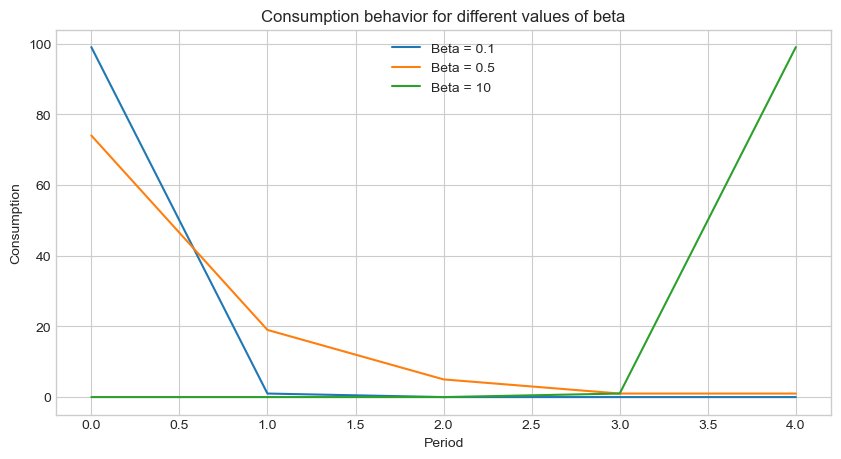

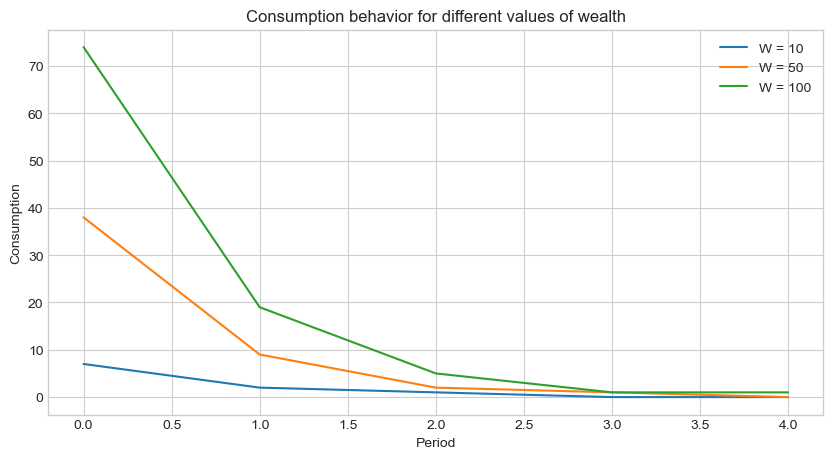

In [136]:
from modelproject import solve_backwards

# 1. parameters
beta_values = [0.1, 0.5, 10]
W_values = [10, 50, 100]
T = 5

# 2. plotting for different values of beta 
plt.figure(figsize=(10, 5))

for beta in beta_values:
    consumption = solve_backwards(W=int(W),beta=beta,T=T)
    plt.plot(range(T), consumption, label=f'Beta = {beta}')

plt.xlabel('Period')
plt.ylabel('Consumption')
plt.title('Consumption behavior for different values of beta')
plt.legend()
plt.show()

# 3. plotting for different values of wealth 
plt.figure(figsize=(10, 5))

for W in W_values:
    consumption = solve_backwards(W=int(W), beta=0.5,T=T)
    plt.plot(range(T), consumption, label=f'W = {W}')

plt.xlabel('Period')
plt.ylabel('Consumption')
plt.title('Consumption behavior for different values of wealth')
plt.legend()
plt.show()

From the first figure we can see that the term beta impacts the consumption's behvavior. 
- As beta grows the agent cares less and less about spending at the first period 
- As beta gets closer to 0 the more the agent spends at the first period

From the second figure we can see that the level of wealth doesn't impact the consumption behavior. 

# Solving the model with value function iterations 

In [143]:
# 1. parameters 
beta = 0.9
W = 5
grid_W = np.arange(W+1)
Cstar = np.zeros([W+1])

# 2. parameters for value function iterations (VFI)
max_iter = 500 # maximum number of iterations 
delta = 1000 # difference between V_now and V_next (arbitrarily set)
tol = 10e-3 # convergence tolerance level
it = 0 # iteration counter 
V_now = np.zeros([W+1]) # arbitrary values

# 3. solving
while (max_iter>=it and tol<delta) :
    it = it+1
    V_next = V_now.copy()
    for w in range(W+1):
        c = np.arange(w+1)
        w_next = w - c 
        V_guess = np.sqrt(c)+beta*V_next[w_next]
        V_now[w] = np.amax(V_guess)
        Cstar[w] = np.argmax(V_guess)
    delta = np.amax(np.abs(V_now - V_next))

print(f'At t = 1, the agent consumes {Cstar[0]} of his wealth. \nAt t = 2, he consumes {Cstar[1]} of his wealth. \nAt t = 3, he consumes {Cstar[2]}. \nAt t = 4, he consumes {Cstar[3]} \nAt t = 5, he consumes {Cstar[4]}. \nAt t = 6, he consumes {Cstar[5]} because he already consumed everything.') 



At t = 1, the agent consumes 0.0 of his wealth. 
At t = 2, he consumes 1.0 of his wealth. 
At t = 3, he consumes 1.0. 
At t = 4, he consumes 1.0 
At t = 5, he consumes 1.0. 
At t = 6, he consumes 1.0 because he already consumed everything.


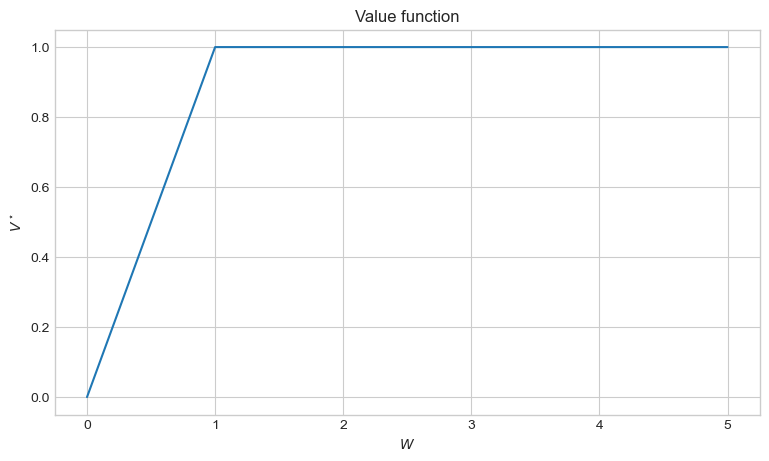

In [114]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,2,1)
ax.plot(np.arange(W+1),Cstar)
ax.set_xlabel(f"$W$")
ax.set_ylabel(f"$V^\star$")
ax.set_title(f'Value function')

plt.show()